In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Simple Model

Simple model to predict significant wave height of one buoy based on another buoy's data.

In [2]:
# ruff: noqa: W293

import logging
import warnings

import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from marine_ml.plots import evaluation_plots
from marine_ml.train import create_model, get_dataset, split_data

warnings.filterwarnings("ignore")

logging.basicConfig(level=logging.INFO)

logger = logging.getLogger("exploration")

# Load Data

In [3]:
X, y = get_dataset()
X_train, X_test, y_train, y_test = split_data(X, y)

# Train Model

In [4]:
model = create_model()

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

# Predict

In [5]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate

In [6]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

log_msg = f"""Model performance...

Training Set:
  RMSE: {train_rmse:.4f}
  MAE:  {train_mae:.4f}
  R^2:   {train_r2:.4f}
  
Test Set:
  RMSE: {test_rmse:.4f}
  MAE:  {test_mae:.4f}
  R^2:   {test_r2:.4f}
"""
logger.info(log_msg)

# Feature importance
feature_importance = pd.DataFrame({"feature": X.columns, "importance": model.feature_importances_}).sort_values(
    "importance", ascending=False
)

log_msg = f"Feature Importance...\n{feature_importance}"
logger.info(log_msg)

INFO:exploration:Model performance...

Training Set:
  RMSE: 0.2821
  MAE:  0.1955
  R^2:   0.9055

Test Set:
  RMSE: 0.2890
  MAE:  0.2029
  R^2:   0.9047

INFO:exploration:Feature Importance...
                                         feature  importance
11  wave_height_significant_m;75_rolling_mean_6h    0.385723
8            wave_height_significant_m;75_lag_6h    0.337973
13         wave_direction_deg;75_rolling_mean_6h    0.128372
7            wave_height_significant_m;75_lag_3h    0.097584
16                                         month    0.020211
2                sea_surface_temperature_degc;75    0.012775
4                          wave_period_mean_s;75    0.004487
3                          wave_period_peak_s;75    0.003662
0                   wave_height_significant_m;75    0.003518
10                  wave_direction_deg;75_lag_6h    0.001696
5                          wave_direction_deg;75    0.001158
1                           wave_height_max_m;75    0.000824
14         

# Visualise

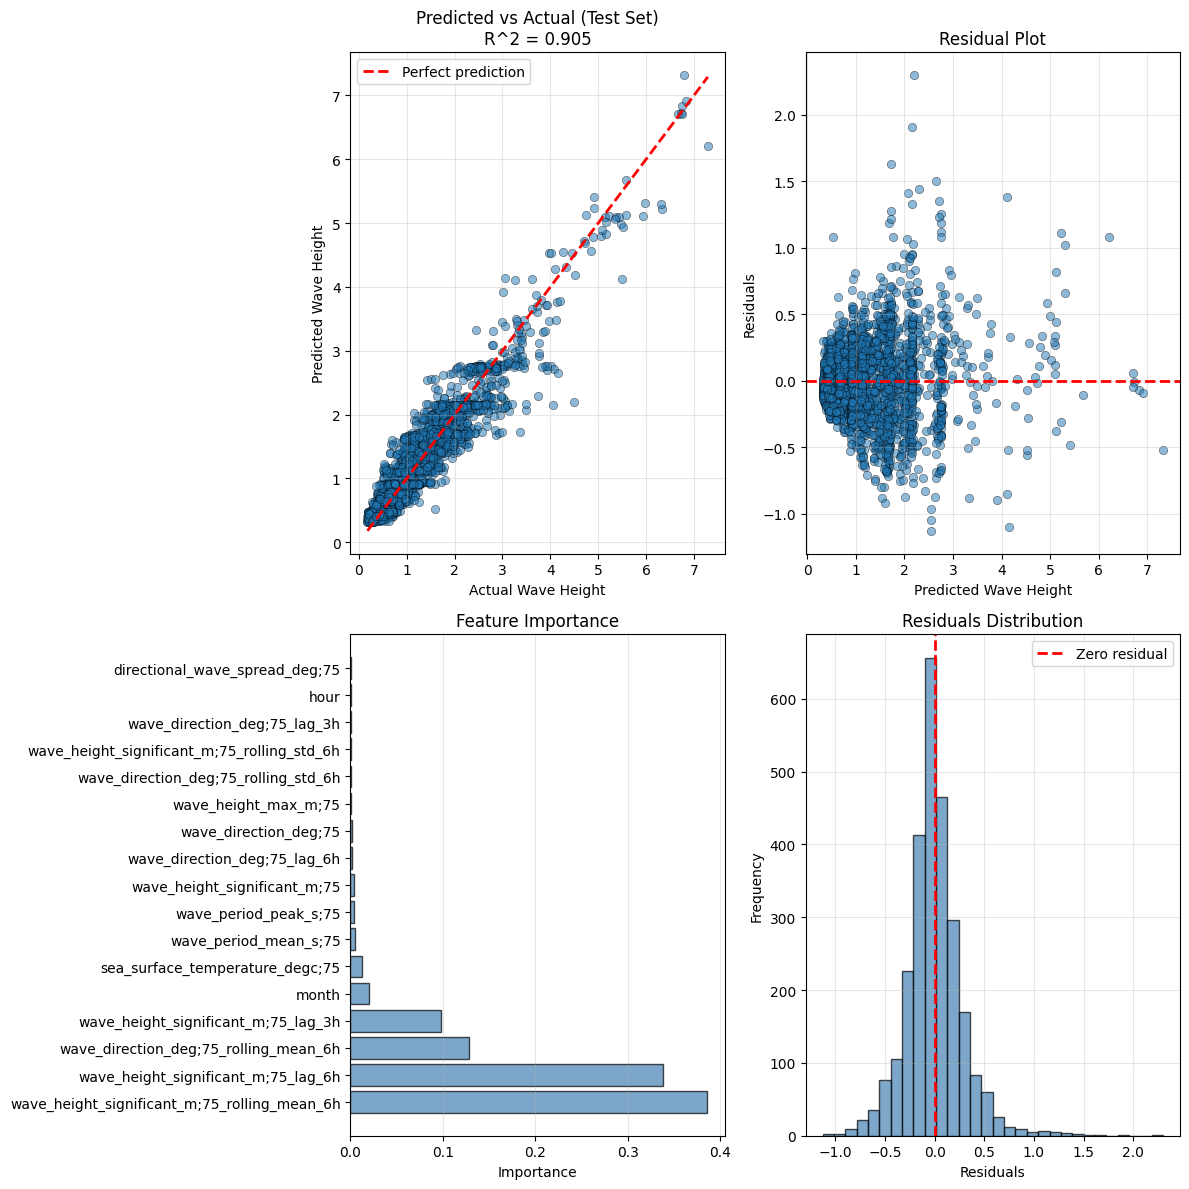

In [7]:
evaluation_plots(y_test=y_test, y_pred=y_test_pred, test_r2=test_r2, feature_importance=feature_importance)